The telecommunications sector in India is rapidly evolving, with many businesses being created and customers frequently switching between providers. **Churn** refers to the process where customers stop using a company's services or products. It is a key challenge for telecom companies to predict and minimize customer churn, as retaining customers is critical to business growth.

As a data scientist for a telecom company, your task is to **predict customer churn** using demographic and usage data from four major telecom partners: *Airtel, Reliance Jio, Vodafone, and BSNL*. You will explore the key factors contributing to customer churn and build predictive models to help the company reduce churn rates.

The dataset contains two csv-files:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [143]:
# Useful libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
import seaborn as sns


In [144]:
#merged datasets using the customer_id column

telecom_demographics = pd.read_csv('telecom_demographics.csv')
telecom_usage = pd.read_csv('telecom_usage.csv')

merged_data = pd.merge(telecom_demographics, telecom_usage, on='customer_id')

print(merged_data)

      customer_id telecom_partner gender  age             state       city  \
0           15169          Airtel      F   26  Himachal Pradesh      Delhi   
1          149207          Airtel      F   74       Uttarakhand  Hyderabad   
2          148119          Airtel      F   54         Jharkhand    Chennai   
3          187288    Reliance Jio      M   29             Bihar  Hyderabad   
4           14016        Vodafone      M   45          Nagaland  Bangalore   
...           ...             ...    ...  ...               ...        ...   
6495        78836          Airtel      M   54            Odisha    Chennai   
6496       146521            BSNL      M   69    Andhra Pradesh  Hyderabad   
6497        40413          Airtel      M   19           Gujarat  Hyderabad   
6498        64961        Vodafone      M   26         Meghalaya    Chennai   
6499        60427    Reliance Jio      M   19           Mizoram  Hyderabad   

      pincode registration_event  num_dependents  estimated_sal

In [145]:
#dropped customer_id, pincode, and registration_event. 
#Handled missing values

columns_to_drop = ['customer_id', 'pincode', 'registration_event']
merged_data = merged_data.drop(columns=columns_to_drop)

missing_values_per_column = merged_data.isnull().sum()
print(missing_values_per_column)


telecom_partner     0
gender              0
age                 0
state               0
city                0
num_dependents      0
estimated_salary    0
calls_made          0
sms_sent            0
data_used           0
churn               0
dtype: int64


In [146]:
#OneHotEncoder encoding method
#OrdinalEncoder encoding method

categorical_variables = ['telecom_partner', 'city', 'state', 'gender']
numerical_columns = ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']

x = merged_data[categorical_variables + numerical_columns]
y = merged_data['churn']

ohe = OneHotEncoder(sparse_output=False, drop='first')
x_ohe = ohe.fit_transform(x[categorical_variables])
ohe_df = pd.DataFrame(x_ohe, columns=ohe.get_feature_names_out(categorical_variables))
x_ohe = pd.concat([x[numerical_columns].reset_index(drop=True), ohe_df], axis=1)

x_train_ohe, x_test_ohe, y_train, y_test = train_test_split(x_ohe, y, test_size=0.2, random_state=42)

print(x_ohe.columns)
ord_enc = OrdinalEncoder()
x_ord_enc = ord_enc.fit_transform(x[categorical_variables])
ordinal_df = pd.DataFrame(x_ord_enc, columns=categorical_variables)

x_ord_enc = pd.concat([ordinal_df, x[numerical_columns].reset_index(drop=True)], axis=1)
x_train_ord, x_test_ord, y_train, y_test = train_test_split(x_ord_enc, y, test_size=0.2, random_state=42)

print(x_ord_enc.columns)


Index(['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent',
       'data_used', 'telecom_partner_BSNL', 'telecom_partner_Reliance Jio',
       'telecom_partner_Vodafone', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata', 'city_Mumbai',
       'state_Arunachal Pradesh', 'state_Assam', 'state_Bihar',
       'state_Chhattisgarh', 'state_Goa', 'state_Gujarat', 'state_Haryana',
       'state_Himachal Pradesh', 'state_Jharkhand', 'state_Karnataka',
       'state_Kerala', 'state_Madhya Pradesh', 'state_Maharashtra',
       'state_Manipur', 'state_Meghalaya', 'state_Mizoram', 'state_Nagaland',
       'state_Odisha', 'state_Punjab', 'state_Rajasthan', 'state_Sikkim',
       'state_Tamil Nadu', 'state_Telangana', 'state_Tripura',
       'state_Uttar Pradesh', 'state_Uttarakhand', 'state_West Bengal',
       'gender_M'],
      dtype='object')
Index(['telecom_partner', 'city', 'state', 'gender', 'age', 'num_dependents',
       'estimated_salary', 'calls_made'

In [147]:
#Scaling numerical features --normalization/standardization
scaler = StandardScaler()
x_ohe[numerical_columns] = scaler.fit_transform(x_ohe[numerical_columns])
x_ord_enc[numerical_columns] = scaler.fit_transform(x_ord_enc[numerical_columns])



In [148]:
#Decision Tree using preprocessed data

tree_ohe = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_ohe.fit(x_train_ohe, y_train)

y_pred_ohe = tree_ohe.predict(x_test_ohe)
prediction_ohe = accuracy_score(y_test, y_pred_ohe)

print(prediction_ohe)

tree_ord = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_ord.fit(x_train_ord, y_train)

y_pred_ord = tree_ord.predict(x_test_ord)
prediction_ord = accuracy_score(y_test, y_pred_ord)
print(prediction_ord)


0.79
0.7876923076923077


In [149]:
#Decision tree with different max_depth 
for depth in [3, 5, 10]:
    tree_ohe = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_ohe.fit(x_train_ohe, y_train)

    y_pred_ohe = tree_ohe.predict(x_test_ohe)
    prediction_ohe = accuracy_score(y_test, y_pred_ohe)

    print(f"oneHot max_depth={depth}: {prediction_ohe}")

    tree_ord = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_ord.fit(x_train_ord, y_train)

    y_pred_ord = tree_ord.predict(x_test_ord)
    prediction_ord = accuracy_score(y_test, y_pred_ord)
    print(f"ordinal max_depth={depth}: {prediction_ord}")


oneHot max_depth=3: 0.79
ordinal max_depth=3: 0.79
oneHot max_depth=5: 0.7830769230769231
ordinal max_depth=5: 0.7876923076923077
oneHot max_depth=10: 0.75
ordinal max_depth=10: 0.7530769230769231


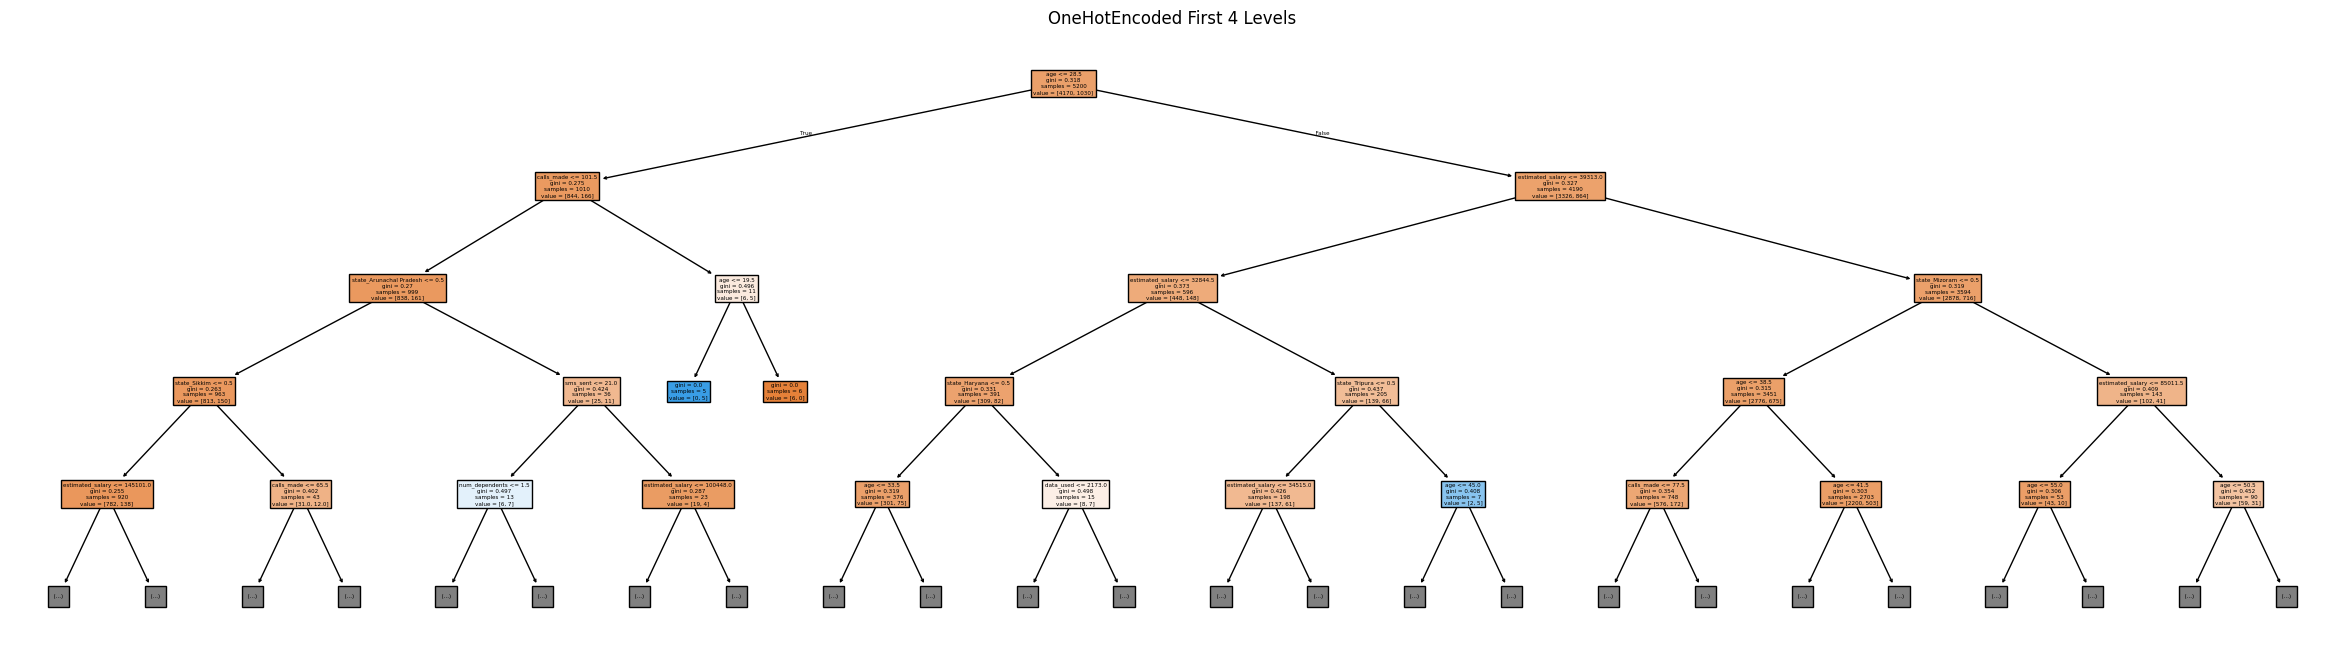

In [150]:
plt.figure(figsize=(30, 8))
plot_tree(tree_ohe, max_depth=4, filled=True, feature_names=x_ohe.columns)
plt.title('OneHotEncoded First 4 Levels')
plt.show()


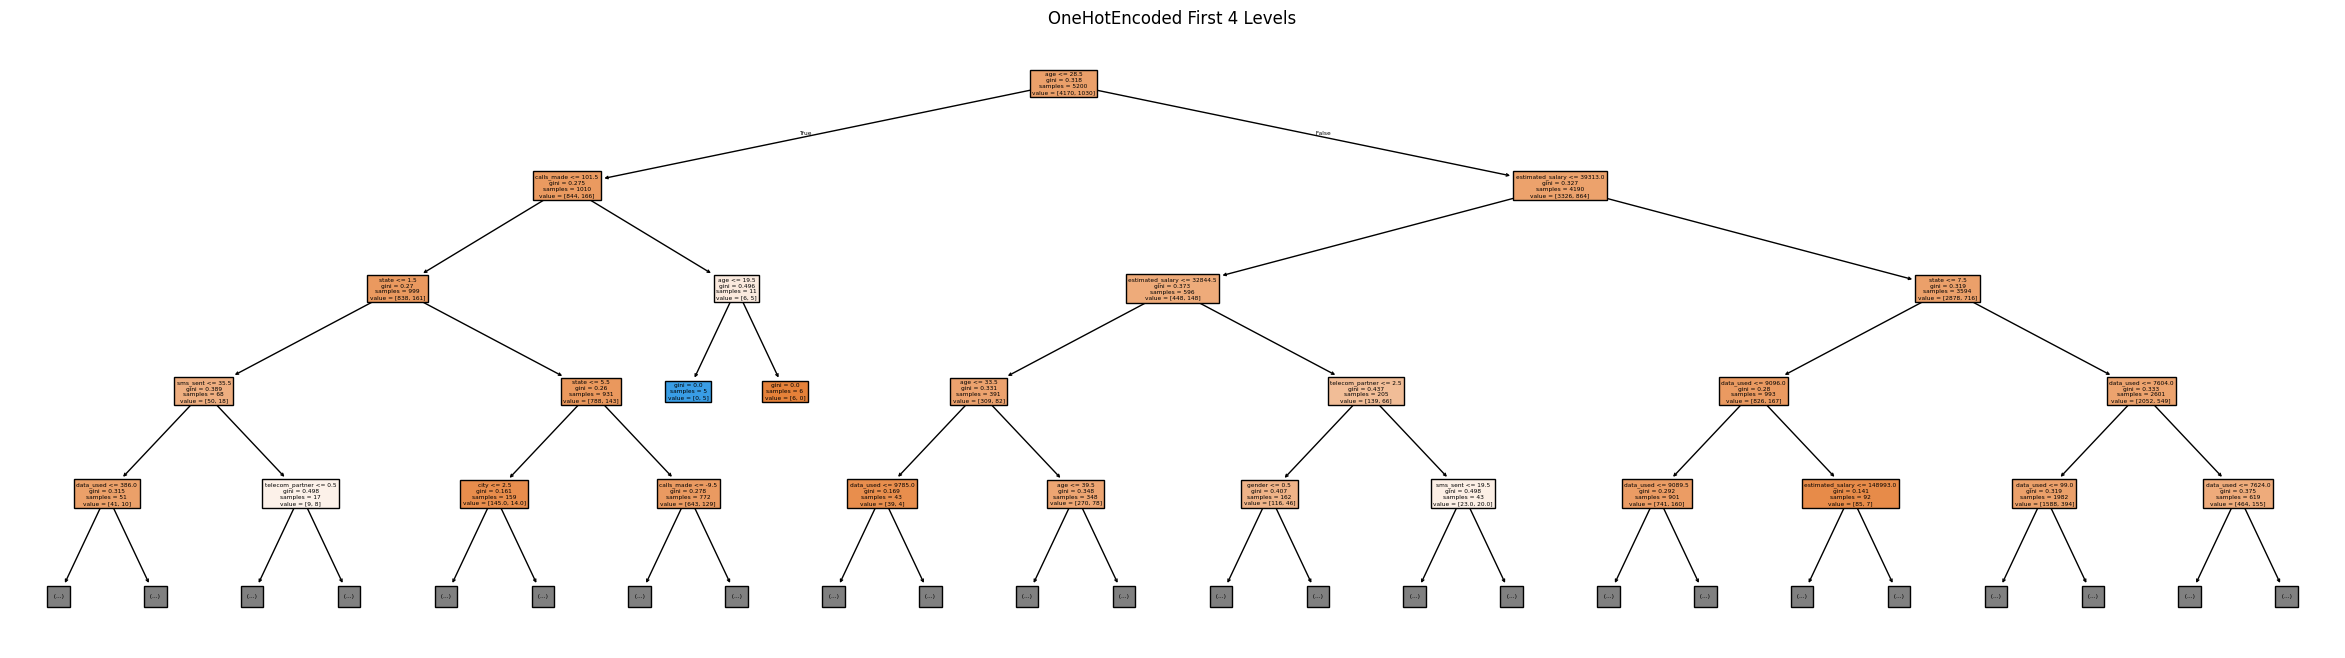

In [151]:
plt.figure(figsize=(30, 8))
plot_tree(tree_ord, max_depth=4, filled=True, feature_names=x_ord_enc.columns)
plt.title('OrdinalEncoder First 4 Levels')
plt.show()
